In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/aoti_data.csv")
print(data.shape)
data.head()

(35064, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [3]:
data_new = data.drop(columns=['month', 'day', 'hour', 'No', 'DEWP', 'TEMP'])
print(data_new.shape)
data_new.head()

(35064, 12)


,year,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,station
0,2013,4.0,4.0,4.0,7.0,300.0,77.0,1023.0,0.0,NNW,4.4,Aotizhongxin
1,2013,8.0,8.0,4.0,7.0,300.0,77.0,1023.2,0.0,N,4.7,Aotizhongxin
2,2013,7.0,7.0,5.0,10.0,300.0,73.0,1023.5,0.0,NNW,5.6,Aotizhongxin
3,2013,6.0,6.0,11.0,11.0,300.0,72.0,1024.5,0.0,NW,3.1,Aotizhongxin
4,2013,3.0,3.0,12.0,12.0,300.0,72.0,1025.2,0.0,N,2.0,Aotizhongxin


In [4]:
data_new.isnull().sum()

year          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
PRES         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [5]:
data_new.isna().sum()

year          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
PRES         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [6]:
data_new.dropna(inplace=True)
print(data_new.shape)

(31815, 12)


In [7]:
data_new['tomorrowPM2.5'] = data_new['PM2.5'].shift(1)
data_new = data_new.drop(data_new.index[0])
data_new.head()

,year,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,station,tomorrowPM2.5
1,2013,8.0,8.0,4.0,7.0,300.0,77.0,1023.2,0.0,N,4.7,Aotizhongxin,4.0
2,2013,7.0,7.0,5.0,10.0,300.0,73.0,1023.5,0.0,NNW,5.6,Aotizhongxin,8.0
3,2013,6.0,6.0,11.0,11.0,300.0,72.0,1024.5,0.0,NW,3.1,Aotizhongxin,7.0
4,2013,3.0,3.0,12.0,12.0,300.0,72.0,1025.2,0.0,N,2.0,Aotizhongxin,6.0
5,2013,5.0,5.0,18.0,18.0,400.0,66.0,1025.6,0.0,N,3.7,Aotizhongxin,3.0


In [8]:
data_new.describe()

,year,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM,tomorrowPM2.5
count,31814.000000,31814.000000,31814.000000,31814.000000,31814.000000,31814.000000,31814.000000,31814.000000,31814.000000,31814.000000,31814.000000
mean,2014.714968,81.866078,109.123989,17.167619,58.977966,1256.604797,56.240285,1011.800033,0.068237,1.720387,81.865606
std,1.162514,80.449570,93.717637,22.761039,37.060821,1223.308678,57.835106,10.338841,0.837502,1.204166,80.449982
min,2013.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.214200,985.900000,0.000000,0.000000,3.000000
25%,2014.000000,22.000000,37.000000,3.000000,30.000000,500.000000,8.000000,1003.300000,0.000000,0.900000,22.000000
50%,2015.000000,58.000000,86.000000,8.000000,53.000000,800.000000,42.000000,1011.200000,0.000000,1.400000,58.000000
75%,2016.000000,114.000000,154.000000,21.000000,82.000000,1500.000000,82.000000,1020.000000,0.000000,2.200000,114.000000
max,2017.000000,713.000000,948.000000,229.000000,290.000000,10000.000000,423.000000,1042.000000,46.400000,11.200000,713.000000


In [9]:
data_new.columns

Index(['year', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'PRES', 'RAIN', 'wd',
       'WSPM', 'station', 'tomorrowPM2.5'],
      dtype='object')

### Line plot for different covariates according to years

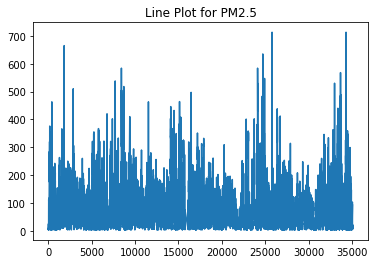

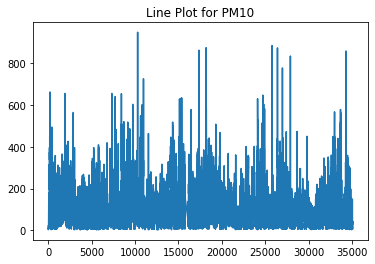

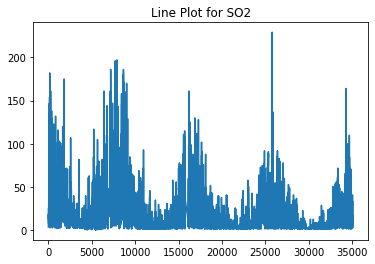

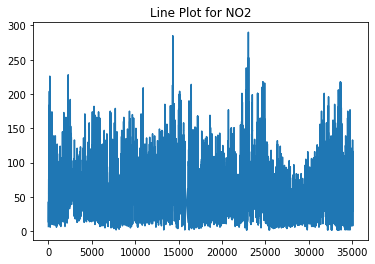

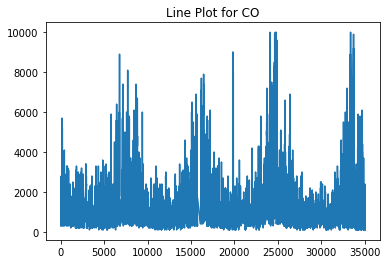

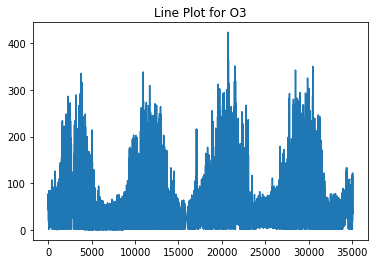

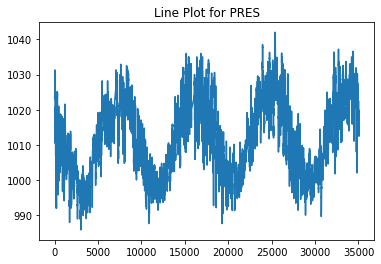

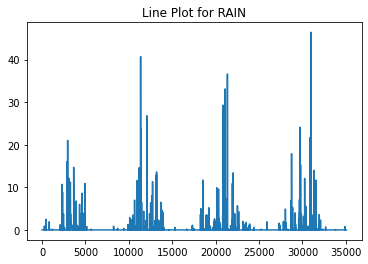

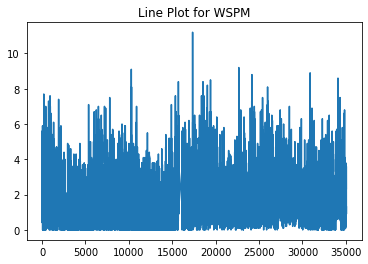

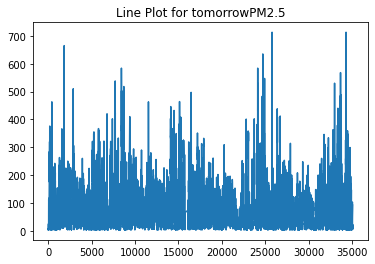

In [10]:
columns_to_plot = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'PRES', 'RAIN', 'WSPM',
                 'tomorrowPM2.5']
for col in columns_to_plot:
    data_new[col].plot()
    plt.title(f"Line Plot for {col}")
    figure_name = "Figure_" + str(col)
    plt.savefig(f"EDA_figures/{figure_name}.pdf", format="pdf", bbox_inches="tight")
    plt.show()

### Mean and Median for different covariates according to years

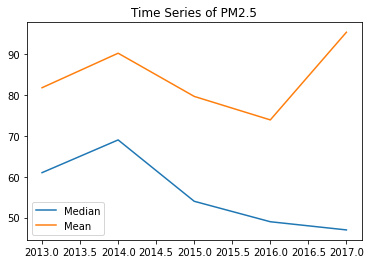

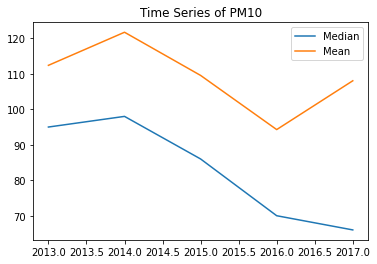

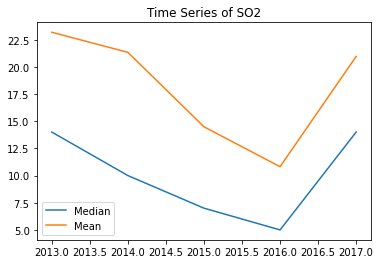

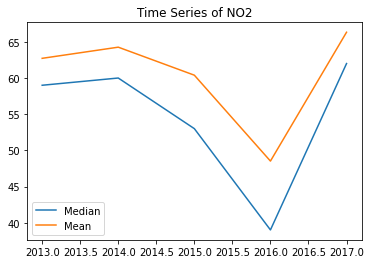

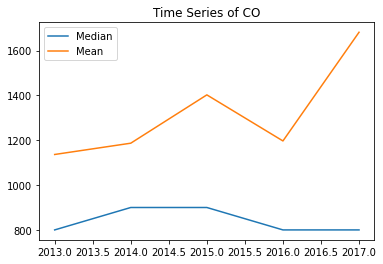

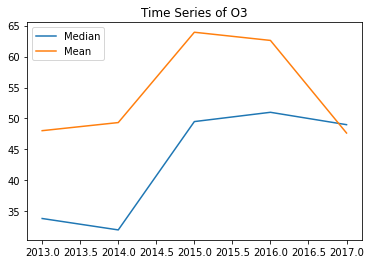

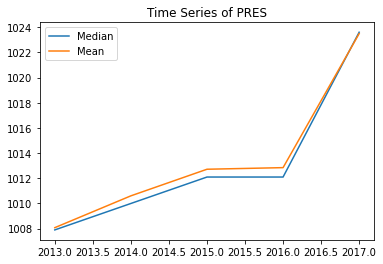

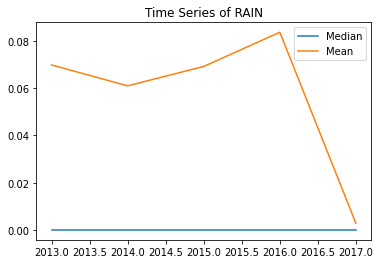

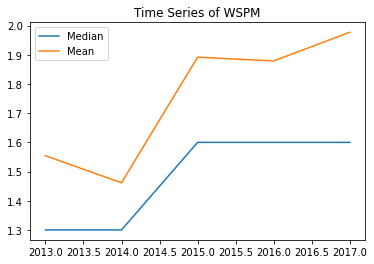

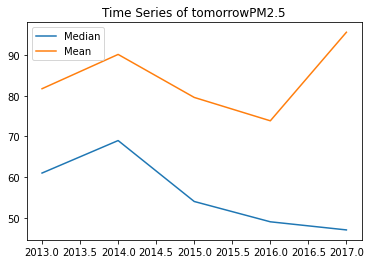

In [11]:
for col in columns_to_plot:
    plt.plot(data_new.groupby('year')[col].median(), label="Median")
    plt.plot(data_new.groupby('year')[col].mean(), label="Mean")
    plt.legend()
    figure_name = "Mean_median" + str(col)
    plt.savefig(f"EDA_figures/{figure_name}.pdf", format="pdf", bbox_inches="tight")
    plt.title(f"Time Series of {col}")
    plt.show()

### Histogram for different covariates

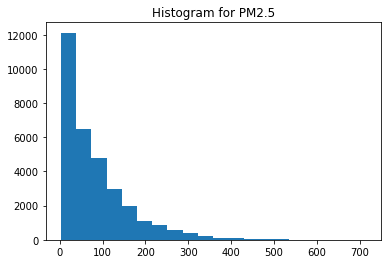

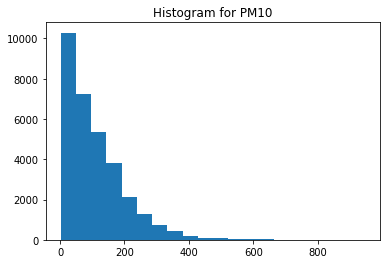

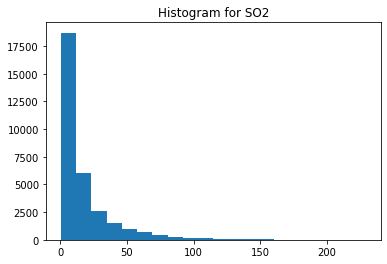

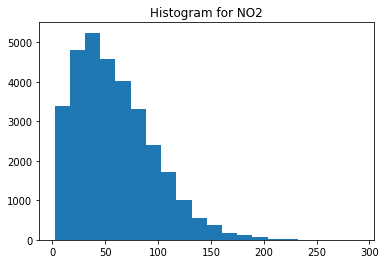

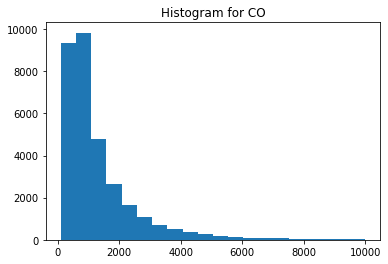

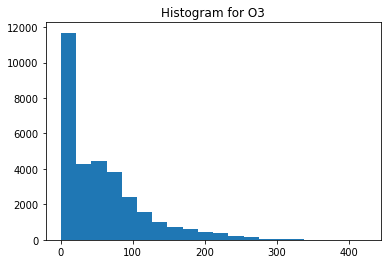

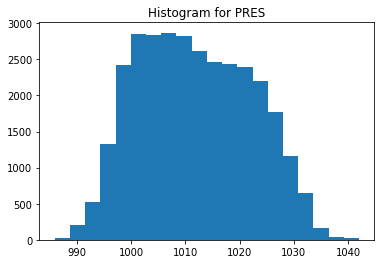

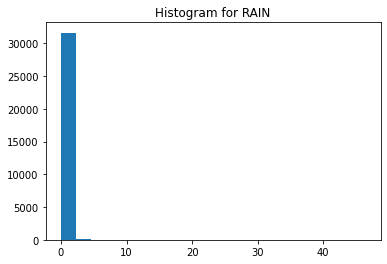

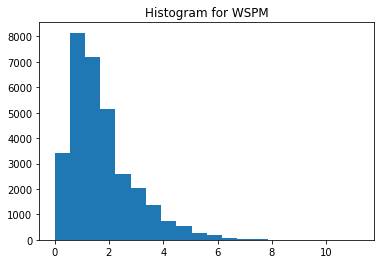

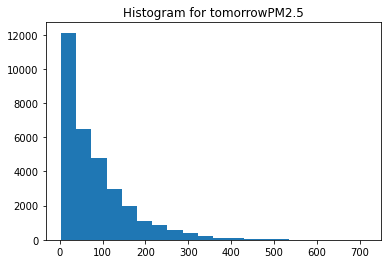

In [12]:
## histograms for all variables
for col in columns_to_plot:
    pd.DataFrame(data_new[col]).hist(bins=20)
    plt.grid(False)
    plt.title(f"Histogram for {col}")
    figure_name = "Histogram_" + str(col)
    plt.savefig(f"EDA_figures/{figure_name}.pdf", format="pdf", bbox_inches="tight")
    plt.show()

### Heatmap for different covariates

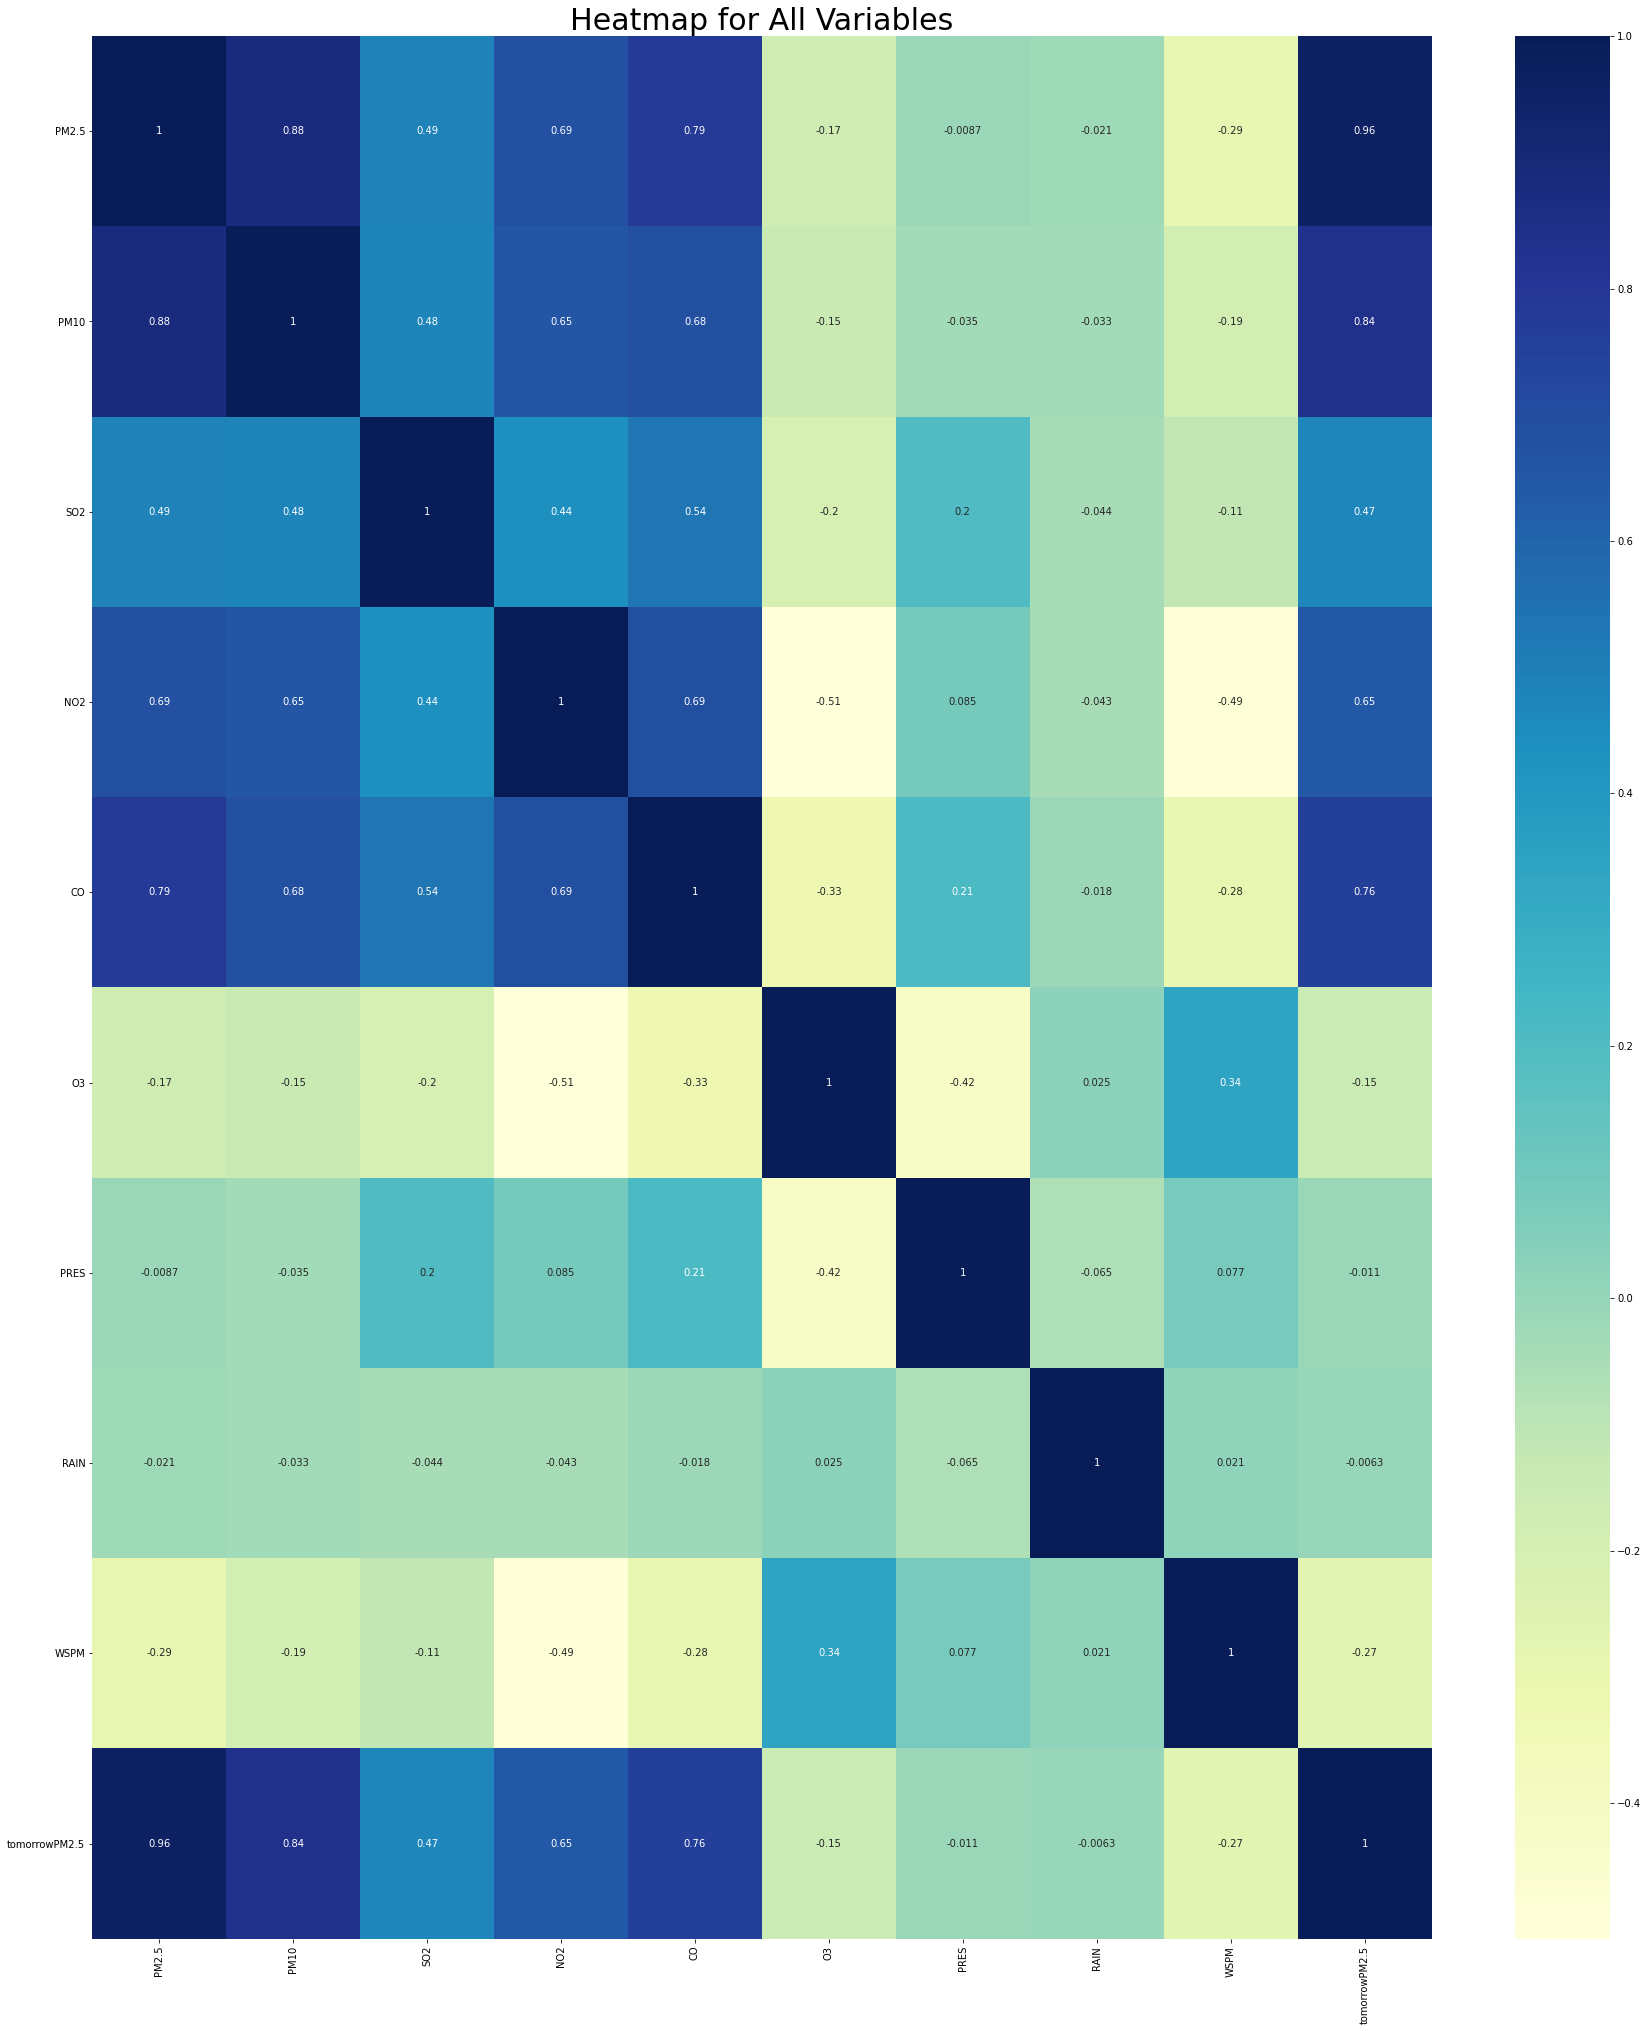

In [16]:
plt.figure(figsize=(30,35))
sns.heatmap(data_new[columns_to_plot].corr(), annot=True, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title("Heatmap for All Variables", fontsize=30)
plt.savefig(f"EDA_figures/heatmap.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Data Preprocessing

In [18]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

drop_columns = ['year','wd', 'station', 'tomorrowPM2.5']
X = data_new.drop(columns=drop_columns, axis=1)
y = data_new['tomorrowPM2.5']


# Apply log normalization to X and y (add a small constant to avoid taking log of 0)
log_constant = 1e-6
X_log = np.log(X + log_constant)
y_log = np.log(y + log_constant)

# Apply RobustScaler to log-normalized X and y
scaler_X = RobustScaler()
X_scaled = scaler_X.fit_transform(X_log)

scaler_y = RobustScaler()
y_scaled = scaler_y.fit_transform(y_log.values.reshape(-1, 1)).reshape(-1)

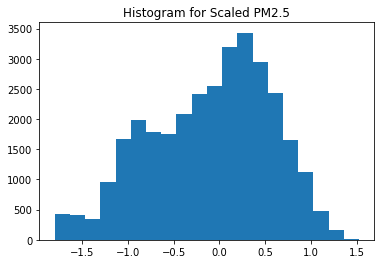

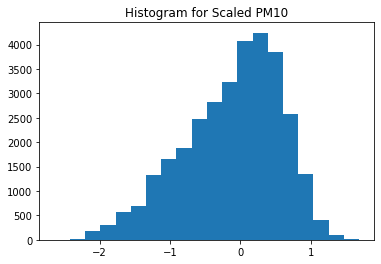

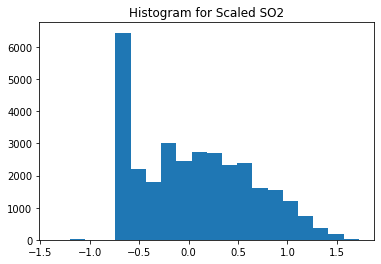

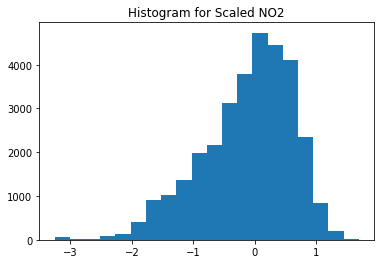

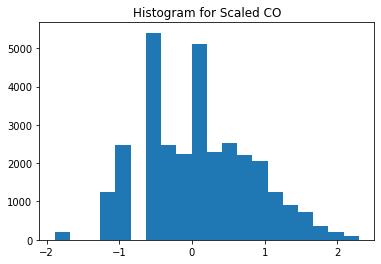

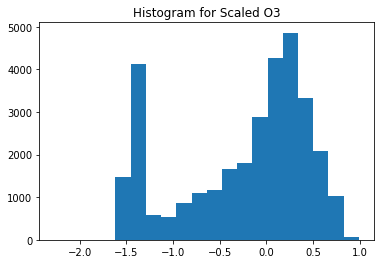

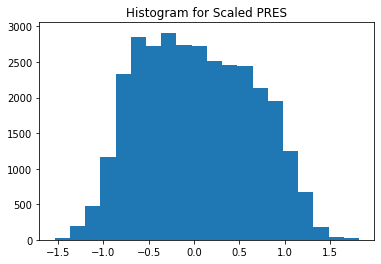

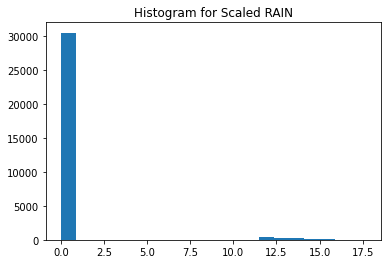

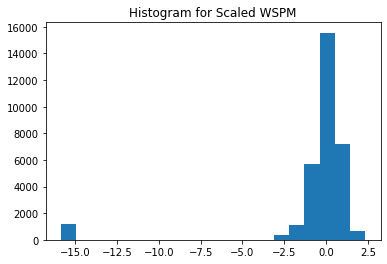

In [20]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
columns_to_plot = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'PRES', 'RAIN', 'WSPM']
for col in columns_to_plot:
    plt.hist(X_scaled_df[col], bins=20)
    plt.title(f"Histogram for Scaled {col}")
    figure_name = "Histogram_sclaed_" + str(col)
    plt.savefig(f"EDA_figures/{figure_name}.pdf", format="pdf", bbox_inches="tight")
    plt.show()

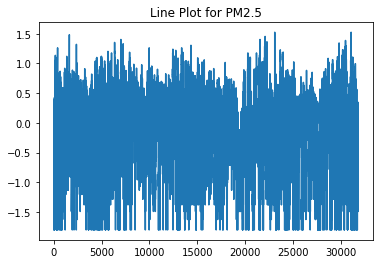

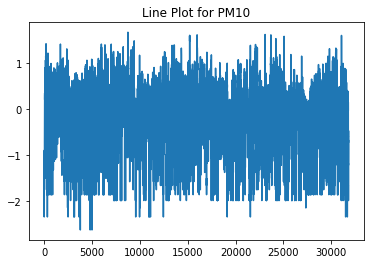

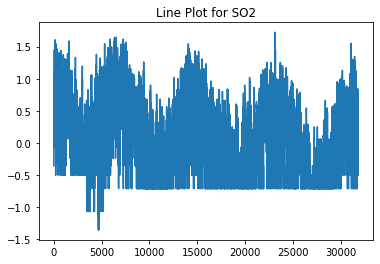

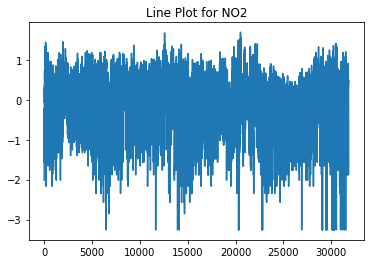

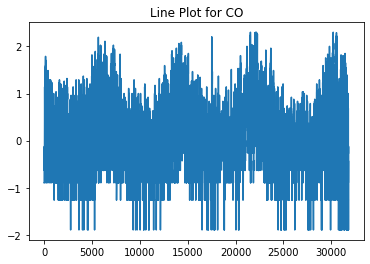

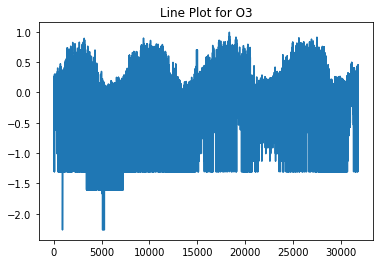

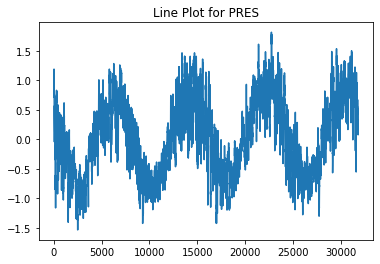

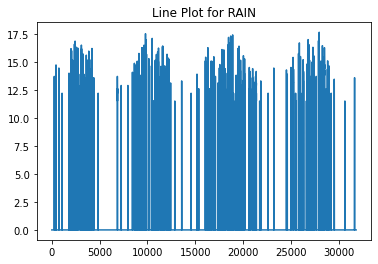

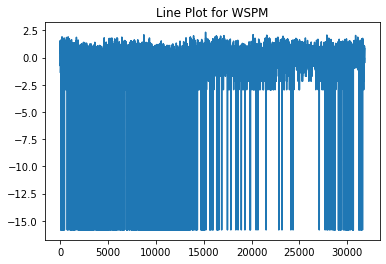

In [17]:
columns_to_plot = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'PRES', 'RAIN', 'WSPM']
for col in columns_to_plot:
    X_scaled_df[col].plot()
    plt.title(f"Line Plot for {col}")
    figure_name = "Figure_sclaed_" + str(col)
    plt.savefig(f"EDA_figures/{figure_name}.pdf", format="pdf", bbox_inches="tight")
    plt.show()

In [18]:
X_scaled_df.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,WSPM
count,31814.000000,31814.000000,31814.000000,31814.000000,31814.000000,31814.000000,31814.000000,31814.000000,31814.000000
mean,-0.099736,-0.116801,0.052767,-0.125735,0.096331,-0.229758,0.032775,0.536819,-0.574374
std,0.669009,0.693304,0.588401,0.742787,0.743234,0.680621,0.618572,2.625317,3.138071
min,-1.800334,-2.637523,-1.356412,-3.259148,-1.892789,-2.268105,-1.534892,0.000000,-15.833196
25%,-0.589245,-0.591451,-0.504046,-0.565969,-0.427816,-0.712518,-0.475112,0.000000,-0.494321
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.410755,0.408549,0.495954,0.434031,0.572184,0.287482,0.524888,0.000000,0.505679
max,1.525107,1.682994,1.723759,1.690256,2.299017,0.992448,1.817548,17.652810,2.326472


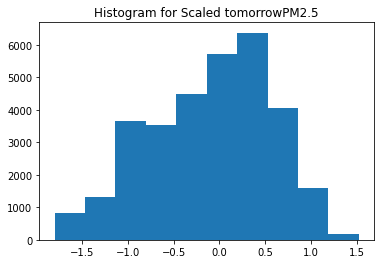

In [19]:
plt.hist(y_scaled)
plt.grid(False)
plt.title(f"Histogram for Scaled tomorrowPM2.5")
plt.savefig(f"EDA_figures/Histogram_scaled_PM2.5.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# Convert the numpy arrays to pandas DataFrames
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

# Export the DataFrames to CSV files
X_train_df.to_csv("X_train_PM2.5.csv", index=False)
X_test_df.to_csv("X_test_PM2.5.csv", index=False)
y_train_df.to_csv("y_train_PM2.5.csv", index=False)
y_test_df.to_csv("y_test_PM2.5.csv", index=False)